In [5]:
import json
import pandas as pd

In [ ]:
combined_data = []

with open("intermediate_data_plain.json", 'r', encoding='utf-8') as f1_file:
    f1_data_list = json.load(f1_file)

with open("output.jsonl", 'r', encoding='utf-8') as entropy_file:
    for data_f1, line_entropy in zip(f1_data_list, entropy_file):
        data_entropy = json.loads(line_entropy)

        f1_value = data_f1["output"]["metric_score"]["f1"]
        acc = data_f1["output"]["metric_score"]["acc"]
        em = data_f1["output"]["metric_score"]["em"]
        consistent = data_entropy["consistent"][0]

        # 组成新的字典
        new_record = {
            'f1_score': f1_value,
            'acc': acc,
            "em": em,
            'consistent_score': consistent
        }

        # 将新字典添加到结果列表中
        combined_data.append(new_record)

    # 检查记录数是否匹配
    if len(f1_data_list) != len(combined_data):
        print(f"警告：.json文件有 {len(f1_data_list)} 条记录，但.jsonl文件处理后只生成了 {len(combined_data)} 条记录。文件可能行数不匹配！")

In [7]:
df = pd.DataFrame(combined_data)
df["is_correct"] = df['em']
# Pearson correlation scores
correlation = df["consistent_score"].corr(df["f1_score"])
print(f"Consistency和F1分数的相关系数是: {correlation:.4f}")

Consistency和F1分数的相关系数是: 0.0831


干扰图像模态作为不确定性指标的AUC分数为: 0.5293


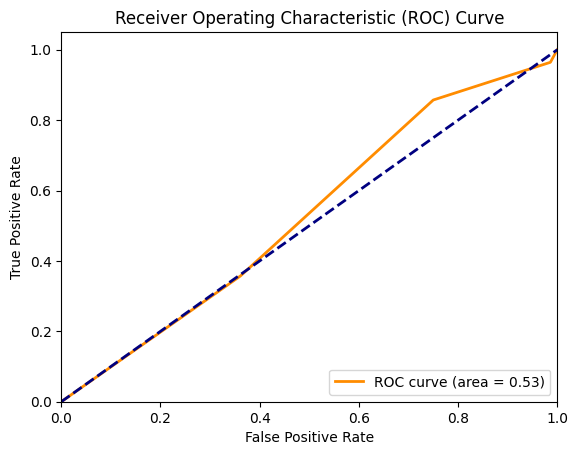

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_true = df["is_correct"]
y_scores = df["consistent_score"]

auc_score = roc_auc_score(y_true, y_scores)
print(f"干扰图像模态作为不确定性指标的AUC分数为: {auc_score:.4f}")

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()